# EVN

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [115]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

In [116]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [117]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [118]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [119]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [120]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [121]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [122]:
# train inputs을 numpy array로 변환
np.array(train_inputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([2, 3, 4, 5]), list([2, 3, 6])], dtype=object)

In [123]:
# train labels을 numpy array로 변환
np.array(train_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list([1, 1, 1, 2]), list([1, 1, 0])], dtype=object)

In [124]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [125]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [126]:
# 정답 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [127]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [128]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[-0.03652365, -0.03861253, -0.02143688,  0.01772345,
         -0.02991807, -0.00331926,  0.00191119, -0.01083668],
        [-0.02804406, -0.00978558, -0.04045171, -0.03574318,
          0.03478975, -0.04791806, -0.01847522,  0.00069817],
        [-0.03572265, -0.0474506 , -0.04174949,  0.01274561,
          0.04667741,  0.02807515, -0.03544771, -0.00593805],
        [ 0.04496915,  0.04308577,  0.04537562,  0.03458443,
          0.02205635, -0.02443345, -0.0068694 , -0.03151951]],

       [[-0.03652365, -0.03861253, -0.02143688,  0.01772345,
         -0.02991807, -0.00331926,  0.00191119, -0.01083668],
        [-0.02804406, -0.00978558, -0.04045171, -0.03574318,
          0.03478975, -0.04791806, -0.01847522,  0.00069817],
        [ 0.00814001,  0.00051843,  0.04944012, -0.00279532,
         -0.03172211,  0.03421496, -0.02557279, -0.0221439 ],
        [-0.00233305,  0.00904446,  0.0404583 ,  0.03247907,
         -0.01337572, -0.

In [129]:
# embedding weight
weight = embedding.get_weights()[0]
weight

array([[-0.00233305,  0.00904446,  0.0404583 ,  0.03247907, -0.01337572,
        -0.02654409,  0.01452787,  0.01917324],
       [ 0.03581326, -0.02989904,  0.00743797, -0.04359806, -0.01182343,
        -0.01026408,  0.0352738 , -0.01433014],
       [-0.03652365, -0.03861253, -0.02143688,  0.01772345, -0.02991807,
        -0.00331926,  0.00191119, -0.01083668],
       [-0.02804406, -0.00978558, -0.04045171, -0.03574318,  0.03478975,
        -0.04791806, -0.01847522,  0.00069817],
       [-0.03572265, -0.0474506 , -0.04174949,  0.01274561,  0.04667741,
         0.02807515, -0.03544771, -0.00593805],
       [ 0.04496915,  0.04308577,  0.04537562,  0.03458443,  0.02205635,
        -0.02443345, -0.0068694 , -0.03151951],
       [ 0.00814001,  0.00051843,  0.04944012, -0.00279532, -0.03172211,
         0.03421496, -0.02557279, -0.0221439 ]], dtype=float32)

In [130]:
# numpy를 이용해서 직접 조회 (두 결과값 비교)
weight[train_inputs], hidden

(array([[[-0.03652365, -0.03861253, -0.02143688,  0.01772345,
          -0.02991807, -0.00331926,  0.00191119, -0.01083668],
         [-0.02804406, -0.00978558, -0.04045171, -0.03574318,
           0.03478975, -0.04791806, -0.01847522,  0.00069817],
         [-0.03572265, -0.0474506 , -0.04174949,  0.01274561,
           0.04667741,  0.02807515, -0.03544771, -0.00593805],
         [ 0.04496915,  0.04308577,  0.04537562,  0.03458443,
           0.02205635, -0.02443345, -0.0068694 , -0.03151951]],
 
        [[-0.03652365, -0.03861253, -0.02143688,  0.01772345,
          -0.02991807, -0.00331926,  0.00191119, -0.01083668],
         [-0.02804406, -0.00978558, -0.04045171, -0.03574318,
           0.03478975, -0.04791806, -0.01847522,  0.00069817],
         [ 0.00814001,  0.00051843,  0.04944012, -0.00279532,
          -0.03172211,  0.03421496, -0.02557279, -0.0221439 ],
         [-0.00233305,  0.00904446,  0.0404583 ,  0.03247907,
          -0.01337572, -0.02654409,  0.01452787,  0.01917324

In [131]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.32974523, 0.3296215 , 0.3406333 ],
        [0.3257774 , 0.33908486, 0.33513775],
        [0.34304488, 0.33106607, 0.32588902],
        [0.34370756, 0.31379122, 0.3425012 ]],

       [[0.32974523, 0.3296215 , 0.3406333 ],
        [0.3257774 , 0.33908486, 0.33513775],
        [0.3385076 , 0.33096296, 0.3305294 ],
        [0.3292255 , 0.32575074, 0.34502375]]], dtype=float32)>

In [132]:
# dense의 wieght, bias
weight, bias = linear.get_weights()
weight, bias

(array([[ 0.65799576, -0.09591937, -0.14494109],
        [ 0.1596083 ,  0.6081739 ,  0.53851646],
        [ 0.03896469, -0.11453933,  0.14302742],
        [ 0.41698998, -0.621888  ,  0.52010673],
        [-0.0777024 , -0.46482053, -0.5654566 ],
        [ 0.25450444,  0.2671408 , -0.5974766 ],
        [ 0.09392697,  0.44472784,  0.44232446],
        [-0.54778224,  0.16085571, -0.5576882 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [133]:
# numpy를 이용한 xW + b
logits = np.matmul(hidden, weight) + bias
logits

array([[[-0.01604448, -0.0164198 ,  0.01644173],
        [-0.05351184, -0.01347581, -0.02518451],
        [-0.02394926, -0.05949246, -0.0752536 ],
        [ 0.06134411, -0.02971923,  0.05782813]],

       [[-0.01604448, -0.0164198 ,  0.01644173],
        [-0.05351184, -0.01347581, -0.02518451],
        [ 0.02710044,  0.00456044,  0.00324955],
        [ 0.00017387, -0.01043665,  0.04704418]]], dtype=float32)

In [134]:
# softmax 계산을 위한 준비 exp(x') / sum(exp(x))
numerator = np.exp(logits)
denominator = np.sum(numerator, axis=2, keepdims=True)
numerator, denominator

(array([[[0.98408353, 0.9837142 , 1.0165776 ],
         [0.94789475, 0.98661464, 0.97512996],
         [0.97633517, 0.9422426 , 0.9275083 ],
         [1.0632647 , 0.9707181 , 1.0595329 ]],
 
        [[0.98408353, 0.9837142 , 1.0165776 ],
         [0.94789475, 0.98661464, 0.97512996],
         [1.0274711 , 1.0045708 , 1.0032549 ],
         [1.0001739 , 0.9896176 , 1.0481683 ]]], dtype=float32),
 array([[[2.9843755],
         [2.9096394],
         [2.846086 ],
         [3.0935156]],
 
        [[2.9843755],
         [2.9096394],
         [3.035297 ],
         [3.0379598]]], dtype=float32))

In [135]:
# 두 결과값 비교
probs = numerator / denominator
probs, outputs

(array([[[0.3297452 , 0.32962146, 0.34063327],
         [0.3257774 , 0.33908486, 0.33513775],
         [0.34304485, 0.3310661 , 0.32588905],
         [0.34370756, 0.31379125, 0.34250122]],
 
        [[0.3297452 , 0.32962146, 0.34063327],
         [0.3257774 , 0.33908486, 0.33513775],
         [0.3385076 , 0.33096296, 0.33052942],
         [0.32922554, 0.3257507 , 0.34502375]]], dtype=float32),
 <tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
 array([[[0.32974523, 0.3296215 , 0.3406333 ],
         [0.3257774 , 0.33908486, 0.33513775],
         [0.34304488, 0.33106607, 0.32588902],
         [0.34370756, 0.31379122, 0.3425012 ]],
 
        [[0.32974523, 0.3296215 , 0.3406333 ],
         [0.3257774 , 0.33908486, 0.33513775],
         [0.3385076 , 0.33096296, 0.3305294 ],
         [0.3292255 , 0.32575074, 0.34502375]]], dtype=float32)>)

In [136]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.
    conv_2 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same')
    hidden = conv_2(hidden)
    conv_3 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same')
    hidden = conv_3(hidden)

    rnn_1 = tf.keras.layers.SimpleRNN(units=16, return_sequences=True)
    hidden = rnn_1(hidden)
    rnn_2 = tf.keras.layers.SimpleRNN(units=16, return_sequences=True)
    hidden = rnn_2(hidden)


    #######################################
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

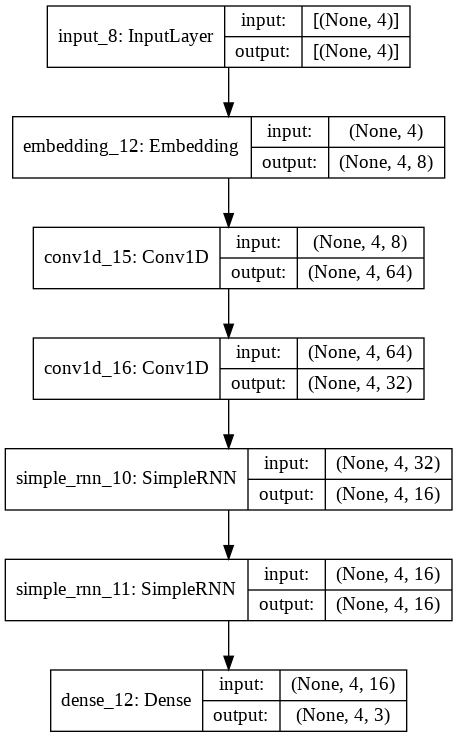

In [137]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [138]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [139]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.1035 - accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 1.0801 - accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0575 - accuracy: 0.6250
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0352 - accuracy: 0.6250
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 1.0129 - accuracy: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9905 - accuracy: 0.8750
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9679 - accuracy: 0.8750
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9450 - accuracy: 0.8750
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.9218 - accuracy: 0.8750
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8983 - accuracy: 0.8750
Epoch 11/100
1/1 [==========

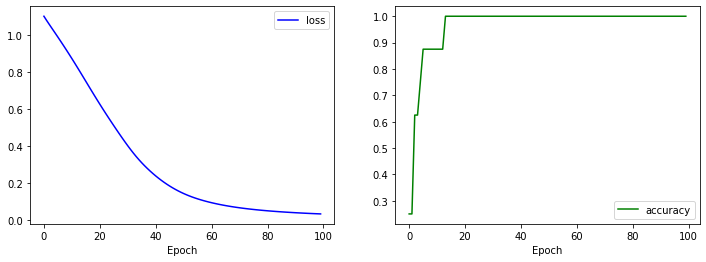

In [140]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [141]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 266ms/step - loss: 0.0322 - accuracy: 1.0000


[0.03222166746854782, 1.0]

## 예측

In [142]:
# 추론할 입력
string = '나는 기분이 우울해'

In [143]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [144]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [145]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [146]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[[0.02115103, 0.956487  , 0.02236205],
        [0.00361341, 0.9741149 , 0.02227168],
        [0.93416166, 0.03499269, 0.03084569],
        [0.026332  , 0.957481  , 0.01618691]]], dtype=float32)

In [147]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])

In [148]:
# 각 예측 값에 대한 label string
for row in y_pred_class:
    for val in row:
        print(val, ':', id_to_label[val])

1 : 중립
1 : 중립
0 : 부정
1 : 중립


# 문장 긍정(1), 부정(0) 분류 프로젝트

## 데이터

In [149]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [1, 0]  # 긍정(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '긍정'}

## Vocabulary

In [150]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [151]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [152]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [153]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [154]:
# 학습용 입력 데이터 생성
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [83]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[1, 0]

In [84]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [85]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [86]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([1, 0])

## 모델링

In [87]:
# 입력 단어를 vector로 변환
embedding = tf.keras.layers.Embedding(len(word_to_id), 8)
hidden = embedding(train_inputs)
hidden

<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[-0.03574306,  0.00403994,  0.00163143,  0.01146026,
          0.01665485,  0.01975993, -0.04219165, -0.0431506 ],
        [-0.03344436,  0.01319106, -0.0139466 ,  0.0311419 ,
          0.02439847, -0.00929445,  0.04804548, -0.0034376 ],
        [ 0.04467524,  0.02620009,  0.03034331,  0.0130338 ,
          0.03701888, -0.02661922,  0.01454859,  0.00384176],
        [ 0.04411941, -0.04373652,  0.0032197 , -0.01208806,
          0.02049239,  0.04698724,  0.01467272, -0.00208058]],

       [[-0.03574306,  0.00403994,  0.00163143,  0.01146026,
          0.01665485,  0.01975993, -0.04219165, -0.0431506 ],
        [-0.03344436,  0.01319106, -0.0139466 ,  0.0311419 ,
          0.02439847, -0.00929445,  0.04804548, -0.0034376 ],
        [ 0.01646203,  0.01629399,  0.03403201, -0.03987656,
          0.02672677, -0.04081772,  0.01770837, -0.04888935],
        [ 0.00884539,  0.03757347, -0.02960837,  0.01561973,
          0.03757799, -0.

In [88]:
# 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
pool = tf.keras.layers.GlobalMaxPool1D()
hidden_pool = pool(hidden)
hidden_pool

<tf.Tensor: shape=(2, 8), dtype=float32, numpy=
array([[0.04467524, 0.02620009, 0.03034331, 0.0311419 , 0.03701888,
        0.04698724, 0.04804548, 0.00384176],
       [0.01646203, 0.03757347, 0.03403201, 0.0311419 , 0.03757799,
        0.01975993, 0.04804548, 0.03900628]], dtype=float32)>

In [89]:
# 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
outputs = linear(hidden_pool)
outputs

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.49598494, 0.5040151 ],
       [0.50481606, 0.4951839 ]], dtype=float32)>

In [90]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)
    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    #######################################
    # 여기에 CNN 및 RNN 모델을 추가해 보세요.

    conv_1 = tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same')
    hidden = conv_1(hidden)
    conv_2 = tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same')
    hidden = conv_2(hidden)

    rnn_1 = tf.keras.layers.SimpleRNN(units=16, return_sequences=True)
    hidden = rnn_1(hidden)
    rnn_2 = tf.keras.layers.SimpleRNN(units=16, return_sequences=True)
    hidden = rnn_2(hidden)

    #######################################
    # 각 단어 벡터의 최대값 기준으로 벡터를 더해서 차원을 줄여줌 (문장 vector 생성)
    pool = tf.keras.layers.GlobalMaxPool1D()
    hidden_pool = pool(hidden)  # (bs, d_model)
    # 문장 vector를 이용해서 긍정(1), 부정(0) 확률값 예측
    linear = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    outputs = linear(hidden_pool)  # (bs, n_out)
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

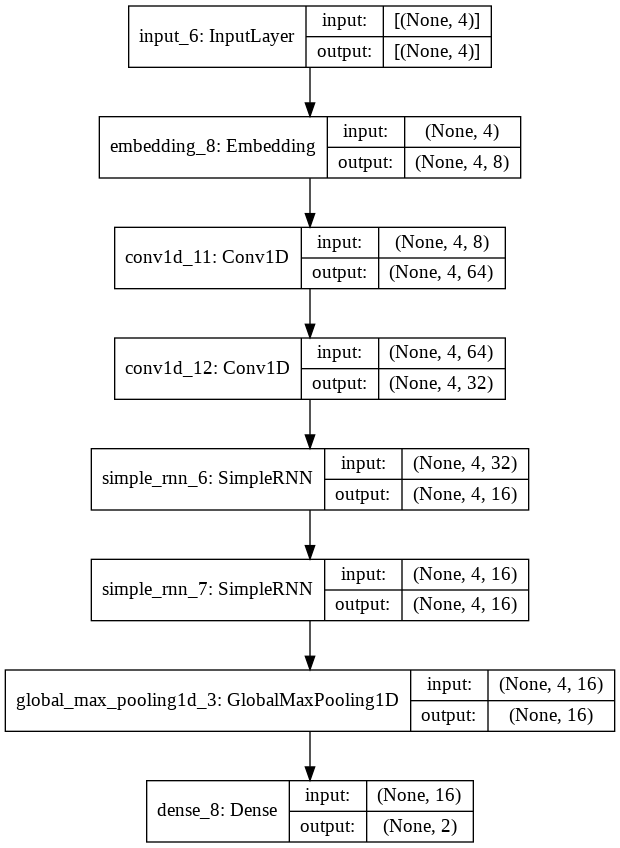

In [91]:
# 모델 생성
model = build_model(len(word_to_id), 8, 4, 2)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [92]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
# 모델 학습
history = model.fit(train_inputs, train_labels, epochs=20, batch_size=16)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.7195 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 9ms/step - loss: 0.7000 - accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6870 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6738 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6593 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6455 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6280 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6049 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 9ms/step - loss: 0.5865 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 0s 9ms/step - loss: 0.5696 - accuracy: 0.5000
Epoch 11/20
1/1 [=============

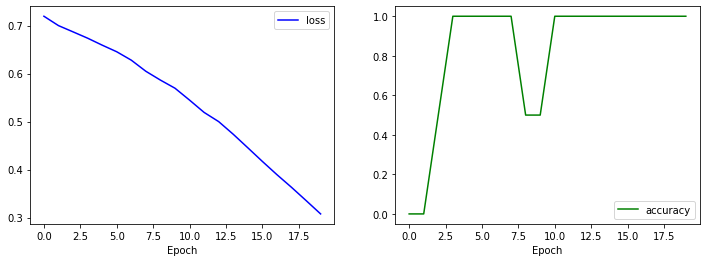

In [94]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 평가

In [95]:
# 모델 평가
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 241ms/step - loss: 0.2821 - accuracy: 1.0000


[0.28211891651153564, 1.0]

## 예측

In [96]:
# 추론할 입력
string = '나는 기분이 우울해'

In [97]:
# 입력을 숫자로 변경
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [98]:
# 문장의 길이를 모두 동일하게 변경 (최대길이 4)
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [99]:
# numpy array 변환 (batch size 1 추가)
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [100]:
# 긍정/부정 추론
y_preds = model.predict(infer_inputs)
y_preds

array([[0.8162711 , 0.18372886]], dtype=float32)

In [101]:
# 확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis=1)
y_pred_class

array([0])

In [102]:
# 각 예측 값에 대한 label string
for val in y_pred_class:
    print(val, ':', id_to_label[val])

0 : 부정
